Modeling Notebook

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score 
from sklearn.metrics import recall_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, plot_roc_curve
from sklearn.metrics import classification_report, auc

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import MissingIndicator, SimpleImputer


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline


%matplotlib inline

In [34]:
water_pump = pd.read_csv('Data/cleaned_water_pump.csv')
water_pump.head()

,status_group,amount_tsh,gps_height,basin,region,region_code,lga,public_meeting,scheme_management,permit,...,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type,water_per_person,unknown_construction_yr,age_at_inspection
0,functional,6000.0,1390,Lake Nyasa,Iringa,11,Ludewa,True,VWC,False,...,user-group,pay annually,good,enough,spring,groundwater,communal standpipe,55.045872,False,12.0
1,functional,0.0,1399,Lake Victoria,Mara,20,Serengeti,Unknown,Other,True,...,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,0.000000,False,3.0
2,functional,25.0,686,Pangani,Manyara,21,Simanjiro,True,VWC,True,...,user-group,pay per bucket,good,enough,dam,surface,communal standpipe multiple,0.100000,False,4.0
3,non functional,0.0,263,Ruvuma / Southern Coast,Mtwara,90,Nanyumbu,True,VWC,True,...,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,0.000000,False,27.0
4,functional,0.0,0,Lake Victoria,Kagera,18,Karagwe,True,Unknown,True,...,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,NaN,True,NaN


In [36]:
water_pump['region_code'] = water_pump['region_code'].astype('str')

In [37]:
water_pump.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status_group             59400 non-null  object 
 1   amount_tsh               59400 non-null  float64
 2   gps_height               59400 non-null  int64  
 3   basin                    59400 non-null  object 
 4   region                   59400 non-null  object 
 5   region_code              59400 non-null  object 
 6   lga                      59400 non-null  object 
 7   public_meeting           59400 non-null  object 
 8   scheme_management        59400 non-null  object 
 9   permit                   59400 non-null  object 
 10  extraction_type_group    59400 non-null  object 
 11  extraction_type_class    59400 non-null  object 
 12  management               59400 non-null  object 
 13  management_group         59400 non-null  object 
 14  payment               

## Dummy

NameError: name 'dummy_model_results' is not defined

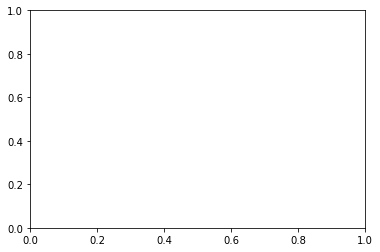

In [27]:
fig, ax = plt.subplots()

ax = dummy_model_results.plot_cv(ax)
plt.tight_layout();

dummy_model_results.print_cv_summary()

NameError: name 'dummy_model' is not defined

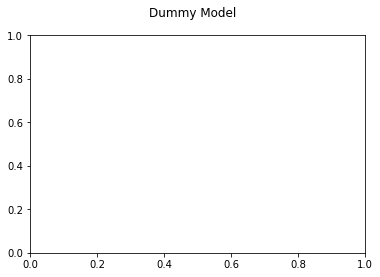

In [28]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

#Plot confusion matrix
plot_confusion_matrix(dummy_model, X_train, y_train, ax =ax);

In [ ]:
dummy_model_results.print_cv_summary()

In [13]:
#function from lecture
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

## Pipeline

In [5]:
X = water_pump.drop('status_group', axis=1)
y = water_pump['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
numeric_cols = ["amount_tsh", "gps_height", "age_at_inspection", "water_per_person"]

cat_cols =["basin", "region", "region_code", "lga", "public_meeting", "scheme_management", "permit",
          "extraction_type_group", "extraction_type_class", "management", "management_group", "payment", "quality_group",
          "quantity", "source", "source_class", "waterpoint_type"]
bool_cols = ["unknown_construction_yr"]

In [7]:
subpipe_num = Pipeline(steps=[("num_impute", SimpleImputer(strategy="mean")),("ss", StandardScaler())])
subpipe_cat = Pipeline(steps=[("ohe", OneHotEncoder(sparse=False, handle_unknown="ignore"))])
subpipe_ord = Pipeline(steps= [("ord_encode", OrdinalEncoder())])

In [8]:
#Column Transformers
CT = ColumnTransformer(transformers=[
                                    ("subpipe_num", subpipe_num, numeric_cols), 
                                     ("subpipe_cat", subpipe_cat, cat_cols),
                                    ("subpipe_ord", subpipe_ord, bool_cols)
                                    ], 
                       remainder="drop"
                      )

In [10]:
dummy_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'age_at_inspection',
                                                   'water_per_person']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                 

In [11]:
dummy_model_pipe.score(X_train, y_train)

0.5416058721856832

In [14]:
dummy_pipe = ModelWithCV(dummy_model_pipe, model_name='Dummy', X=X_train, y=y_train)

In [15]:
dummy_pipe.print_cv_summary()

CV Results for `Dummy` model:
            0.54161 ± 0.00007 accuracy
        


## Logistic

In [ ]:
logreg_model_pipe = Pipeline(steps=[('ct', CT), 
                                    ('logreg', LogisticRegression(random_state=42, cv=10, max_iter=1000))])

In [ ]:
logreg_model_pipe.fit(X_train, y_train)
logreg_model_pipe.score(X_train, y_train)

In [ ]:
y_train.value_counts(normalize=True)

In [25]:
y_train.value_counts()

0    24128
2    17150
1     3271
Name: status_group, dtype: int64

In [ ]:
sm = SMOTE(sampling_strategy='auto',random_state=42)

In [ ]:
sm2 = SMOTE(sampling_strategy=0.8, random_state=42)

In [ ]:
X_train_clean = X_train.select_dtypes(['float', 'int']).dropna()
y_train_clean = y_train[X_train_clean.index]

In [ ]:
...
# transform the dataset
strategy = {0:24128, 1:17150., 2:6542}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

In [ ]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

GRIDSEARCH KNN

In [16]:
knneighbors_model_pipe = Pipeline(steps=[('ct', CT), ('knn', KNeighborsClassifier())])

In [17]:
knneighbors_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'age_at_inspection',
                                                   'water_per_person']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                 

In [12]:
knneighbors_model_pipe.score(X_train, y_train)

0.8241037958203327

## DIFFERENT KNN PARAMS

In [21]:
knneighbors_model_pipe = Pipeline(steps=[('ct', CT), ('knn', KNeighborsClassifier(
    metric='manhattan', n_neighbors=7, weights='distance'))])

In [22]:
knneighbors_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'age_at_inspection',
                                                   'water_per_person']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                 

In [23]:
knneighbors_model_pipe.score(X_train, y_train)

0.9393925789580013

In [13]:
pipe_grid = {
    'knn__n_neighbors': [3, 5, 7], 
    'knn__metric': ['minkowski', 'manhattan', 'euclidean'],
    'knn__weights': ['uniform', 'distance']

}


gs_pipe = GridSearchCV(estimator=knneighbors_model_pipe, param_grid=pipe_grid)

In [29]:
pipe_grid = {
    'knn__n_neighbors': [7, 9, 11], 
    'knn__metric': ['minkowski', 'manhattan', 'euclidean'],
    'knn__weights': ['uniform', 'distance']

}


gs_pipe = GridSearchCV(estimator=knneighbors_model_pipe, param_grid=pipe_grid)

In [14]:
gs_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('num_impute',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'age_at_inspection',
                                                                          'water_per_person']),
                                                                        ('subpip

In [30]:
gs_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('num_impute',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'age_at_inspection',
                                                                          'water_per_person']),
                                                                        ('subpip

In [15]:
gs_pipe.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}

In [38]:
gs_pipe.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 11,
 'knn__weights': 'distance'}

In [16]:
print(gs_pipe.best_params_)
print(gs_pipe.best_score_)
print(gs_pipe.best_estimator_.score(X_train, y_train))

{'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
0.7700286057340722
0.9393925789580013


In [17]:
pd.DataFrame(gs_pipe.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.046689,0.098149,27.071660,0.278594,minkowski,3,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.765432,0.761504,0.762851,0.761055,0.762151,0.762598,0.001541,14
1,5.237351,0.366315,27.889166,1.514914,minkowski,3,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.758025,0.753086,0.761392,0.758810,0.756314,0.757525,0.002758,17
2,4.891255,0.339943,32.957679,0.370794,minkowski,5,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.773850,0.764085,0.765881,0.760943,0.767314,0.766415,0.004283,6
3,5.008935,0.078231,32.707769,0.526529,minkowski,5,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.768911,0.760831,0.767901,0.760831,0.766304,0.764955,0.003469,11
4,5.039832,0.036451,37.685687,0.240116,minkowski,7,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.773513,0.763636,0.765881,0.760606,0.767987,0.766325,0.004349,8
5,4.657758,0.539810,34.482282,0.637324,minkowski,7,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.774860,0.763300,0.773064,0.763636,0.772702,0.769512,0.004990,2
6,4.225638,0.033435,23.706810,0.511297,manhattan,3,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.766779,0.762065,0.764085,0.763749,0.764732,0.764282,0.001528,13
7,4.318217,0.060685,23.073787,0.217216,manhattan,3,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.758025,0.753984,0.763636,0.759596,0.758895,0.758827,0.003093,16
8,5.055396,0.973614,31.423065,1.850562,manhattan,5,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.772952,0.765881,0.768687,0.762963,0.768436,0.767784,0.003311,4
9,4.767206,0.050468,29.771654,0.188024,manhattan,5,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.768238,0.762963,0.770034,0.761728,0.766865,0.765966,0.003146,10


In [39]:
pd.DataFrame(gs_pipe.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.574021,0.732027,41.103817,2.779553,minkowski,7,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.773513,0.763636,0.765881,0.760606,0.767987,0.766325,0.004349,12
1,5.258479,0.374742,39.033751,2.185307,minkowski,7,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.774860,0.763300,0.773064,0.763636,0.772702,0.769512,0.004990,8
2,5.014034,0.564649,43.743894,2.046834,minkowski,9,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.770483,0.761841,0.765769,0.760943,0.767651,0.765337,0.003565,14
3,5.373117,1.213064,41.477833,1.808091,minkowski,9,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.776768,0.762963,0.774186,0.768799,0.776294,0.771802,0.005247,5
4,4.533995,0.041904,43.422511,0.394993,minkowski,11,uniform,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.765769,0.759259,0.761841,0.760718,0.764957,0.762509,0.002483,17
5,4.621193,0.154883,47.507620,6.337146,minkowski,11,distance,"{'knn__metric': 'minkowski', 'knn__n_neighbors...",0.776431,0.764310,0.774186,0.771044,0.775845,0.772363,0.004440,2
6,4.976944,0.411378,37.277960,2.213745,manhattan,7,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.774747,0.764310,0.765993,0.761504,0.769896,0.767290,0.004614,10
7,4.798975,0.189146,38.646799,6.556106,manhattan,7,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.772952,0.763636,0.774747,0.764422,0.774385,0.770029,0.004941,7
8,5.190303,0.611717,42.060993,2.614062,manhattan,9,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.773625,0.764085,0.767116,0.761392,0.768212,0.766886,0.004129,11
9,4.919588,0.575674,41.036437,1.780552,manhattan,9,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.775421,0.764983,0.776207,0.767677,0.776294,0.772116,0.004810,4


In [51]:
log_model_pipe = Pipeline(steps=[('ct', CT), ('log', LogisticRegression())])


In [43]:
log_model_pipe.fit(X_train, y_train)

/Users/mysterious/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'age_at_inspection',
                                                   'water_per_person']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                 

In [44]:
log_model_pipe.score(X_train, y_train)

0.7484792026757054

In [52]:
pipe_grid_log = {
    'log__solver': ['sag', 'lbfgs'],
    'log__max_iter': [800, 900, 1000,],
    'log__multi_class': ['multinomial'],
    'log__C': [.01, .1, 1, 10, 100, 1000],
}
gs_pipe_log = GridSearchCV(estimator=log_model_pipe, param_grid=pipe_grid_log)

In [ ]:
gs_pipe_log.fit(X_train, y_train)

/Users/mysterious/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mysterious/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mysterious/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mysterious/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Use

/Users/mysterious/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mysterious/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mysterious/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/mysterious/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Use

In [ ]:
print(gs_pipe_log.best_params_)
print(gs_pipe_log.best_score_)
print(gs_pipe_log.best_estimator_.score(X_train, y_train))

In [ ]:
dt_model_pipe = Pipeline(steps=[('ct', CT), ('dt', DecisionTreeClassifier(random_state=42, min_impurity_decrease= 0.3))])

In [ ]:
dt_model_pipe.fit(X_train, y_train)

In [ ]:
dt_model_pipe.score(X_train, y_train)

In [ ]:
pipe_grid_dt = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'], 
    'dt__class_weight': ['None', 'balanced'],
    'dt__min_impurity_decrease': [0.15, 0.2, 0.3]

}


gs_pipe_dt = GridSearchCV(estimator=dt_model_pipe, param_grid=pipe_grid_dt)

In [ ]:
gs_pipe_dt.fit(X_train, y_train)

In [ ]:
print(gs_pipe_dt.best_params_)
print(gs_pipe_dt.best_score_)
print(gs_pipe_dt.best_estimator_.score(X_train, y_train))

In [ ]:
rfc = RandomForestClassifier(random_state=42, n_estimators=500)

rfc_model_pipe = Pipeline([('ct', CT), ('rfc', rfc)])

In [ ]:
rfc_model_pipe.fit(X_train, y_train)

In [ ]:
params = { 'rfc__n_estimators': [100, 250, 400, 700, 1000],
          
           'rfc__min_samples_leaf': [5 5, 10]
       
            'ct__subpipe_num__num_impute__strategy': ['mean']
        }

In [ ]:
def grab_numeric(df):
    return water_pump.select_dtypes(include=['float', 'int'])

In [ ]:
GrabNumeric = FunctionTransformer(grab_numeric)

In [ ]:
##graph for top features
# Creating a large figure
fig = plt.figure(figsize=(15, 8))

# Iterating over the different
for i in range(0, 4):
    # Figure number starts at 1
    ax = fig.add_subplot(2, 2, i+1)
    # Add a title to make it clear what each subplot shows
    plt.title(df.columns[i])
    # Use alpha to better see crossing pints
    ax.scatter(df['target'], df.iloc[:, i], c='teal', alpha=0.1)
    # Only show the tick marks for each target
    plt.xticks(df.target.unique())

In [ ]:
log_loss(y, logreg.predict_proba(X))